# Members of Parliment - India Performance & EDA

In [1]:
import os as os 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
os.chdir('C:\Analytics')

In [3]:
mp =pd.read_excel('MPs.xls')

In [4]:
mp.head()

,MP name,No. of Term,State,Political party,Gender,Age,Debates,Private Member Bills,Questions,Attendance
0,A. Anwhar Raajhaa,First,Tamil Nadu,All India Anna Dravida Munnetra Kazhagam,Male,67,28.0,0.0,107.0,0.73
1,A. Arunmozhithevan,First,Tamil Nadu,All India Anna Dravida Munnetra Kazhagam,Male,48,29.0,0.0,361.0,0.86
2,A.P. Jithender Reddy,Second,Telangana,Telangana Rashtra Samithi,Male,62,62.0,4.0,62.0,0.87
3,A.T. Nana Patil,Second,Maharashtra,Bharatiya Janata Party,Male,55,64.0,14.0,347.0,0.87
4,Abhijit Mukherjee,Second,West Bengal,Indian National Congress,Male,57,31.0,0.0,143.0,0.97


In [5]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 10 columns):
MP name                 555 non-null object
No. of Term             555 non-null object
State                   553 non-null object
Political party         555 non-null object
Gender                  555 non-null object
Age                     555 non-null int64
Debates                 524 non-null float64
Private Member Bills    524 non-null float64
Questions               524 non-null float64
Attendance              523 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 32.6+ KB


In [6]:
mp.columns

Index(['MP name', 'No. of Term', 'State', 'Political party', 'Gender', 'Age',
       'Debates', 'Private Member Bills', 'Questions', 'Attendance'],
      dtype='object')

In [7]:
mp.isnull().sum()

MP name                  0
No. of Term              0
State                    2
Political party          0
Gender                   0
Age                      0
Debates                 31
Private Member Bills    31
Questions               31
Attendance              32
dtype: int64

Remove the NA from the attendacne. AS Debates,Attendance,Questions are important columns. It cannot be impute with other variables so we will eliminate those rows from the dataset. States has two missing values that is fine we can make is INDIA. 

In [8]:
mp = mp.dropna(axis=0, subset=['Attendance'])

In [9]:
mp.isnull().sum()

MP name                 0
No. of Term             0
State                   2
Political party         0
Gender                  0
Age                     0
Debates                 0
Private Member Bills    0
Questions               0
Attendance              0
dtype: int64

In [10]:
mp['State']=mp['State'].fillna("India")

In [11]:
mp.isnull().sum()

MP name                 0
No. of Term             0
State                   0
Political party         0
Gender                  0
Age                     0
Debates                 0
Private Member Bills    0
Questions               0
Attendance              0
dtype: int64

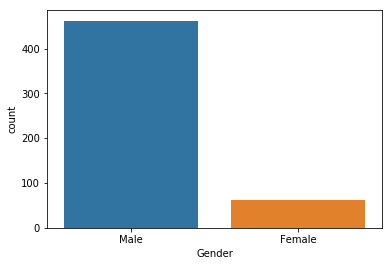

In [12]:
sns.countplot(x='Gender' ,data=mp)

In [13]:
mp.Gender.value_counts('normalize')

Male      0.883365
Female    0.116635
Name: Gender, dtype: float64

Only 11.66% of Female MP's in the Loksabha but we are talking about 33% for Females.

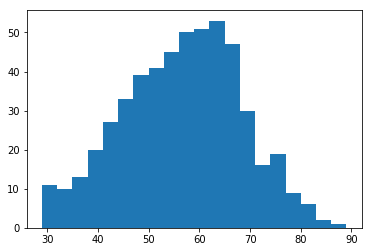

In [14]:
plt.hist(mp['Age'],bins=20)
plt.show()

Majority of them are from age 50-70

In [15]:
mp.groupby(['Gender']).mean()['Age']

Gender
Female    49.000000
Male      57.155844
Name: Age, dtype: float64

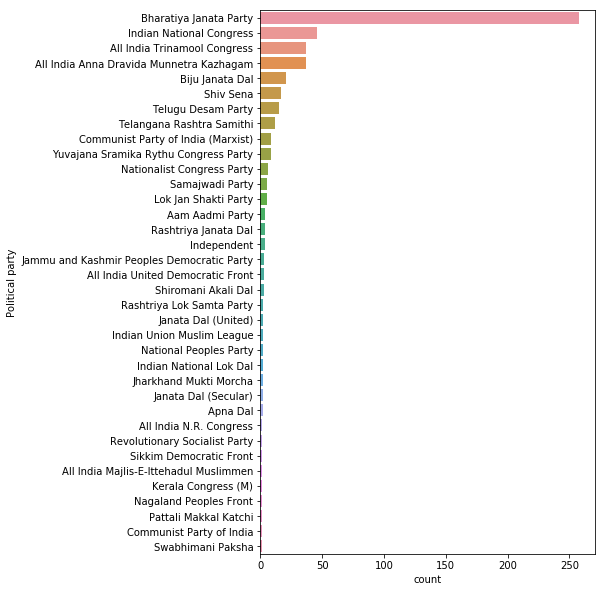

In [16]:
plt.figure(figsize=(6,10))
sns.countplot(y='Political party' ,data=mp ,order = mp['Political party'].value_counts().index);

In [17]:
party=mp.groupby(['Political party']).agg (
    {
        'Age':[min,max,"mean"],
        'MP name' : "count",
        'Debates' : "mean",
        'Questions':"mean",
        'Attendance':"mean"
        
    })



In [18]:
party.columns=party.columns.droplevel(level=1)

In [19]:
party.columns =['age_min','age_max','age_mean','mp_no','debates','questions','attendance']
party.columns
party

,age_min,age_max,age_mean,mp_no,debates,questions,attendance
Political party,,,,,,,
Aam Aadmi Party,43,76,63.250000,4,31.750000,24.000000,0.592500
All India Anna Dravida Munnetra Kazhagam,29,70,53.594595,37,35.459459,262.810811,0.811081
All India Majlis-E-Ittehadul Muslimmen,47,47,47.000000,1,45.000000,530.000000,0.850000
All India N.R. Congress,45,45,45.000000,1,8.000000,11.000000,0.630000
All India Trinamool Congress,29,78,55.189189,37,17.567568,42.432432,0.642432
All India United Democratic Front,59,67,63.000000,3,42.666667,186.333333,0.626667
Apna Dal,35,66,50.500000,2,33.000000,338.000000,0.900000
Bharatiya Janata Party,29,89,56.608527,258,52.391473,155.104651,0.865504
Biju Janata Dal,36,75,53.619048,21,40.428571,142.761905,0.832857


In [20]:
party.reset_index(level=0,inplace=True)


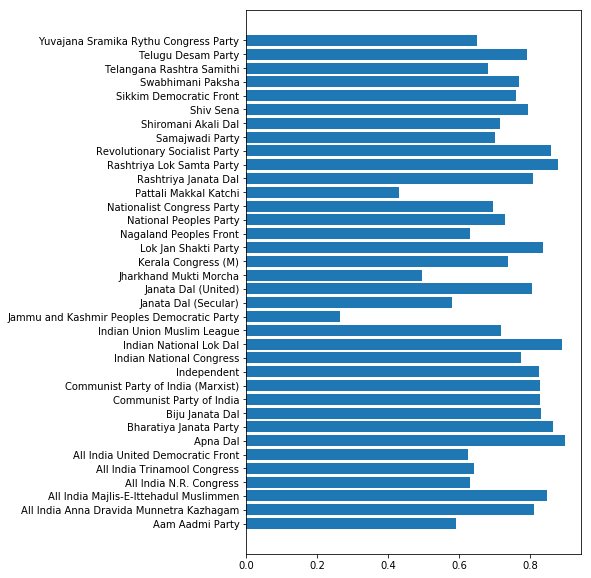

In [21]:
plt.figure(figsize=(6,10))
plt.barh(party['Political party'],party['attendance'])
plt.show()

In [22]:
party[party['mp_no'] > 5].sort_values(['attendance','mp_no','debates','questions'],ascending=False)

,Political party,age_min,age_max,age_mean,mp_no,debates,questions,attendance
7,Bharatiya Janata Party,29,89,56.608527,258,52.391473,155.104651,0.865504
8,Biju Janata Dal,36,75,53.619048,21,40.428571,142.761905,0.832857
10,Communist Party of India (Marxist),43,71,57.666667,9,129.111111,242.333333,0.827778
1,All India Anna Dravida Munnetra Kazhagam,29,70,53.594595,37,35.459459,262.810811,0.811081
30,Shiv Sena,30,73,54.764706,17,66.588235,419.058824,0.795882
34,Telugu Desam Party,29,76,59.333333,15,29.133333,174.866667,0.792667
12,Indian National Congress,34,81,60.043478,46,39.369565,190.043478,0.775217
23,Nationalist Congress Party,41,72,53.666667,6,27.000000,404.333333,0.695000
33,Telangana Rashtra Samithi,33,66,53.666667,12,29.166667,135.416667,0.683333
35,Yuvajana Sramika Rythu Congress Party,32,72,52.111111,9,35.000000,178.444444,0.651111


Although Indian National Congress is strong oppostion party in the lok sabha, the party contribution towards the beates and questions is poor compared to other party. 

Marxist the best performance in attendance,questions and debates

Trinamool congress is the worst performer in the loksabha.

In [23]:
mp[mp['Age']<30]

,MP name,No. of Term,State,Political party,Gender,Age,Debates,Private Member Bills,Questions,Attendance
5,Abhishek Banerjee,First,West Bengal,All India Trinamool Congress,Male,29,3.0,0.0,45.0,0.35
132,Dushyant Chautala,First,Haryana,Indian National Lok Dal,Male,29,171.0,16.0,475.0,0.89
167,Heena Vaijaykumar Gavit,First,Maharashtra,Bharatiya Janata Party,Female,29,40.0,0.0,618.0,0.80
175,J. Jayavardhan,First,Tamil Nadu,All India Anna Dravida Munnetra Kazhagam,Male,29,41.0,0.0,368.0,0.83
388,Raksha Nikhil Khadase,First,Maharashtra,Bharatiya Janata Party,Female,29,36.0,0.0,290.0,0.77
411,Rammohan Naidu Kinjarapu,First,Andhra Pradesh,Telugu Desam Party,Male,29,77.0,0.0,298.0,0.95


In [24]:
mp[mp['Age']>80]

,MP name,No. of Term,State,Political party,Gender,Age,Debates,Private Member Bills,Questions,Attendance
75,Bhuwan Chandra Khanduri,Fifth,Uttarakhand,Bharatiya Janata Party,Male,82,12.0,5.0,104.0,0.96
87,C. L. Ruala,Second,Mizoram,Indian National Congress,Male,81,2.0,0.0,3.0,0.91
131,Dr Bhola Singh,Second,Bihar,Bharatiya Janata Party,Male,82,23.0,0.0,223.0,0.89
153,H.D. Devegowda,Sixth,Karnataka,Janata Dal (Secular),Male,83,14.0,0.0,0.0,0.54
249,Lal Krishna Advani,Seventh,Gujarat,Bharatiya Janata Party,Male,89,1.0,0.0,0.0,0.95
254,Liladharbhai Khodaji Vaghela,First,Gujarat,Bharatiya Janata Party,Male,82,0.0,0.0,7.0,0.74
291,Murli Manohar Joshi,Sixth,Uttar Pradesh,Bharatiya Janata Party,Male,83,0.0,0.0,0.0,0.89
464,Shanta Kumar,Fourth,Himachal Pradesh,Bharatiya Janata Party,Male,82,0.0,0.0,13.0,0.90


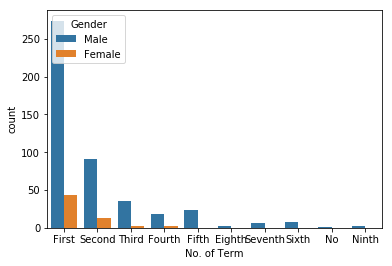

In [25]:
sns.countplot(x='No. of Term', hue='Gender',data=mp);

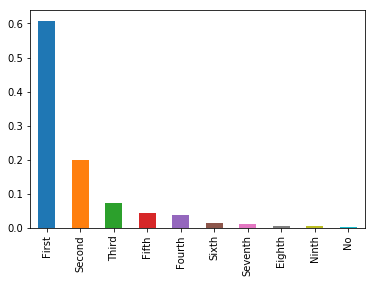

In [26]:
mp['No. of Term'].value_counts('normalize').plot(kind='bar');

60% of Mp's are first time parliment members. There are two mp's who are winning ninth time.

In [27]:
mp.sort_values(['Questions','Debates'] ,ascending=False).head()

,MP name,No. of Term,State,Political party,Gender,Age,Debates,Private Member Bills,Questions,Attendance
118,Dhananjay Bhimrao Mahadik,First,Maharashtra,Nationalist Congress Party,Male,45,30.0,0.0,704.0,0.67
500,Supriya Sule,Second,Maharashtra,Nationalist Congress Party,Female,47,67.0,12.0,703.0,0.95
476,Shrirang Appa Barne,First,Maharashtra,Shiv Sena,Male,53,213.0,12.0,695.0,0.92
471,Shivaji Adhalrao Patil,Third,Maharashtra,Shiv Sena,Male,60,20.0,3.0,678.0,0.66
537,Vijaysinh Shankarrao Mohite Patil,First,Maharashtra,Nationalist Congress Party,Male,72,0.0,0.0,676.0,0.57


Shrirang Appa Barne have asked more number of questions and has good % of attendance and participated in good number of debates and Bills as well. 

In [28]:
mp.sort_values(['Questions','Debates'] ,ascending=False).tail()

,MP name,No. of Term,State,Political party,Gender,Age,Debates,Private Member Bills,Questions,Attendance
474,Shrimant Chh. Udyanraje Pratapsinhmaharaj Bhonsle,Second,Maharashtra,Nationalist Congress Party,Male,51,0.0,0.0,0.0,0.28
483,Sreemati Dev Varma (Moon Moon Sen),First,West Bengal,All India Trinamool Congress,Female,63,0.0,0.0,0.0,0.69
487,Subrata Bakshi,Second,West Bengal,All India Trinamool Congress,Male,66,0.0,0.0,0.0,0.27
526,Uma Saren,First,West Bengal,All India Trinamool Congress,Female,32,0.0,0.0,0.0,0.65
549,Vitthalbhai Hansrajbhai Radadiya,Second,Gujarat,Bharatiya Janata Party,Male,58,0.0,0.0,0.0,0.19


In [29]:
mp.loc[mp['Age'].idxmin()]

MP name                            Abhishek Banerjee
No. of Term                                    First
State                                    West Bengal
Political party         All India Trinamool Congress
Gender                                          Male
Age                                               29
Debates                                            3
Private Member Bills                               0
Questions                                         45
Attendance                                      0.35
Name: 5, dtype: object

In [30]:
mp.loc[mp['Age'].idxmax()]

MP name                     Lal Krishna Advani
No. of Term                            Seventh
State                                  Gujarat
Political party         Bharatiya Janata Party
Gender                                    Male
Age                                         89
Debates                                      1
Private Member Bills                         0
Questions                                    0
Attendance                                0.95
Name: 249, dtype: object